# Lasso and Ridge Regression

Importing the Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston,load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Loading the Boston Data and Adding the target column.

In [22]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target

The Price variable is the target variable.

## Data description

The Boston data frame has 506 rows and 14 columns.
This data frame contains the following columns:

crim <br>
per capita crime rate by town.

zn <br>
proportion of residential land zoned for lots over 25,000 sq.ft.

indus <br>
proportion of non-retail business acres per town.

chas <br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox <br>
nitrogen oxides concentration (parts per 10 million).

rm <br>
average number of rooms per dwelling.

age <br>
proportion of owner-occupied units built prior to 1940.

dis <br>
weighted mean of distances to five Boston employment centres.

rad <br>
index of accessibility to radial highways.

tax <br>
full-value property-tax rate per $10,000.

ptratio <br>
pupil-teacher ratio by town.

black <br>
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat <br>
lower status of the population (percent).

Price <br>
median value of owner-occupied homes in $1000s.

In [23]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
boston_df.shape

(506, 14)

1) Separating Target And Data <br>
2) Splitting data into training and testing

In [25]:
X = boston_df.drop('Price',axis=1)
Y = boston_df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

## Linear Regression

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.
The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute.


Let’s look at the training set and test set performance:

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print("Linear Regression train:",lr_train_score)
print("Linear Regression test:",lr_test_score)

Linear Regression train: 0.741903496034
Linear Regression test: 0.714689598929


## Ridge Regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [27]:
rr = Ridge(alpha = 1.0)
rr.fit(X_train,y_train)

rr_train_score = rr.score(X_train,y_train)
rr_test_score = rr.score(X_test,y_test)

print("Ridge Regression train:",rr_train_score)
print("Ridge Regression test:",rr_test_score)

Ridge Regression train: 0.740624231468
Ridge Regression test: 0.704334479359


We used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression.

In [28]:
rrh = Ridge(alpha = 100)
rrh.fit(X_train,y_train)

rrh_train_score = rrh.score(X_train,y_train)
rrh_test_score = rrh.score(X_test,y_test)

print("Ridge 100 Regression train:",rrh_train_score)
print("Ridge 100 Regression test:",rrh_test_score)

Ridge 100 Regression train: 0.717280966994
Ridge 100 Regression test: 0.680583889473


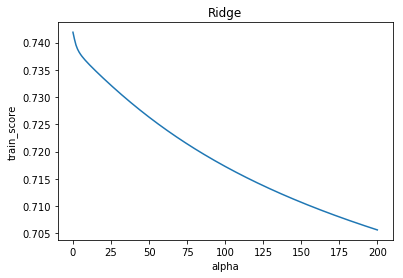

In [46]:
alphas = np.arange(201)
alphas
trains = []
for a in alphas:
    rrh = Ridge(alpha = a)
    rrh.fit(X_train,y_train)
    rrh_train_score = rrh.score(X_train,y_train)
    trains.append(rrh_train_score)
ax = plt.gca()

ax.plot(alphas, trains)
plt.xlabel('alpha')
plt.ylabel('train_score')
plt.title('Ridge')
plt.axis('tight')
plt.show()

## Lasso Regression

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

1) Loading the Breast Cancer Data <br>
2) Separating Target and Data <br>
3) Splitting Training and Testing <br>

In [31]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
cancer_df['Diagnosis'] = cancer.target
X1 = cancer.data
Y1 = cancer.target
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1, test_size=0.3, random_state=31)

## Data Description

In this practice dataset, tumor characteristics of the cell nuclei are derived form digitized image of a fine needle aspirate of a breast mass.

Diagnosis is target variable
Ten real-valued features were computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>

In [32]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
cancer_df.shape

(569, 31)

In [10]:
#Lasso with alpha = 1.0
la = Lasso(alpha = 1.0)
la.fit(X1_train,y1_train)
coef_used = np.sum(la.coef_!=0)

#Linear Regression
lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)

#Scoring the models
la_train_score = la.score(X1_train,y1_train)
la_test_score = la.score(X1_test,y1_test)

lr1_train_score = lr1.score(X1_train,y1_train)
lr1_test_score = lr1.score(X1_test,y1_test)

#Printing the Scores
print("Linear Regression train:",lr1_train_score)
print("Linear Regression test:",lr1_test_score)
print("Lasso Regression train:",la_train_score)
print("Lasso Regression test:",la_test_score)
print("No of features used:",coef_used)

Linear Regression train: 0.7842206194055069
Linear Regression test: 0.732932501088866
Lasso Regression train: 0.5600974529893081
Lasso Regression test: 0.5832244618818156
No of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 30 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run).

In [13]:
la = Lasso(alpha = 0.0001,max_iter = 10e5)
la.fit(X1_train,y1_train)
coef_used = np.sum(la.coef_!=0)

la_train_score = la.score(X1_train,y1_train)
la_test_score = la.score(X1_test,y1_test)

print("Lasso Regression train:",la_train_score)
print("Lasso Regression test:",la_test_score)
print("No of features used:",coef_used)

Lasso Regression train: 0.7754092006936697
Lasso Regression test: 0.7318608210757904
No of features used: 22


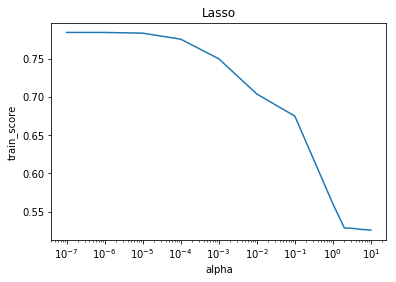

In [64]:
alphas = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10]
alphas
trains = []
for a in alphas:
    la = Lasso(alpha = a,max_iter = 10e5)
    la.fit(X1_train,y1_train)
    coef_used = np.sum(la.coef_!=0)
    la_train_score = la.score(X1_train,y1_train)
    trains.append(la_train_score)
ax = plt.gca()

ax.plot(alphas, trains)
plt.xlabel('alpha')
plt.ylabel('train_score')
plt.xscale('log')
plt.title('Lasso')
plt.axis('tight')
plt.show()

A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 22 of the 30 features. This makes this model potentially easier to understand.
If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression.

# Conclusion 

In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.